## Source of data: https://www.kaggle.com/c/digit-recognizer ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('Data/MNIST/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The first column of the data is the label of the handwritten digit (values 0-9). The other 784 columns are actual grayscale images which are 28x28 pixel matrices with values 0-255, but stretched out in 1 dimension. ###

### Next, we'll write a function to take a row and convert it into a 28x28 image (simple reshape) ###

In [8]:
def viewImage(arr):
    return np.reshape(arr,[28,28])



### Then we convert the dataframe into an array and separate the label column. ###

In [10]:
labels = data.label
digits = np.array(data)
digits = digits[:,1:]


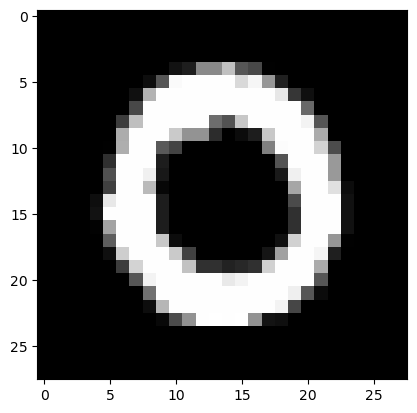

In [19]:
plt.imshow(viewImage(digits[1,:]),'gray')

In [21]:
zerolabels = []
zerodigits = []
for i in range(len(labels)):
    if labels[i]==0:
        zerolabels.append(0)
        zerodigits.append(digits[i,:])
    
zerolabels = np.array(zerolabels)
zerodigits = np.array(zerodigits)

print(zerolabels.shape)
print(zerodigits.shape)

(4132,)
(4132, 784)


### Let's view the first few images ###

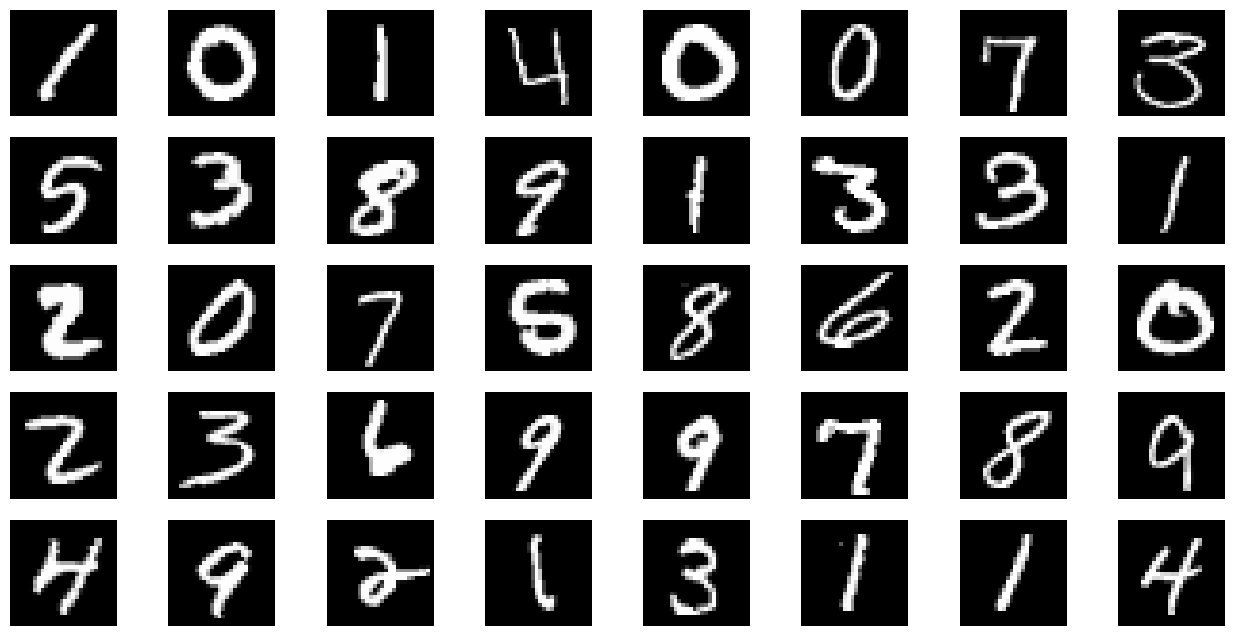

In [25]:
fig = plt.figure(figsize=(16, 8))
for i in range(digits.shape[0]):
    ax = fig.add_subplot(5,8,i+1)
    ax.imshow(viewImage(digits[i,:]),'gray')
    ax.axis('off')
    if i==39:
        break

plt.show()

### And now, a sample from each class ###

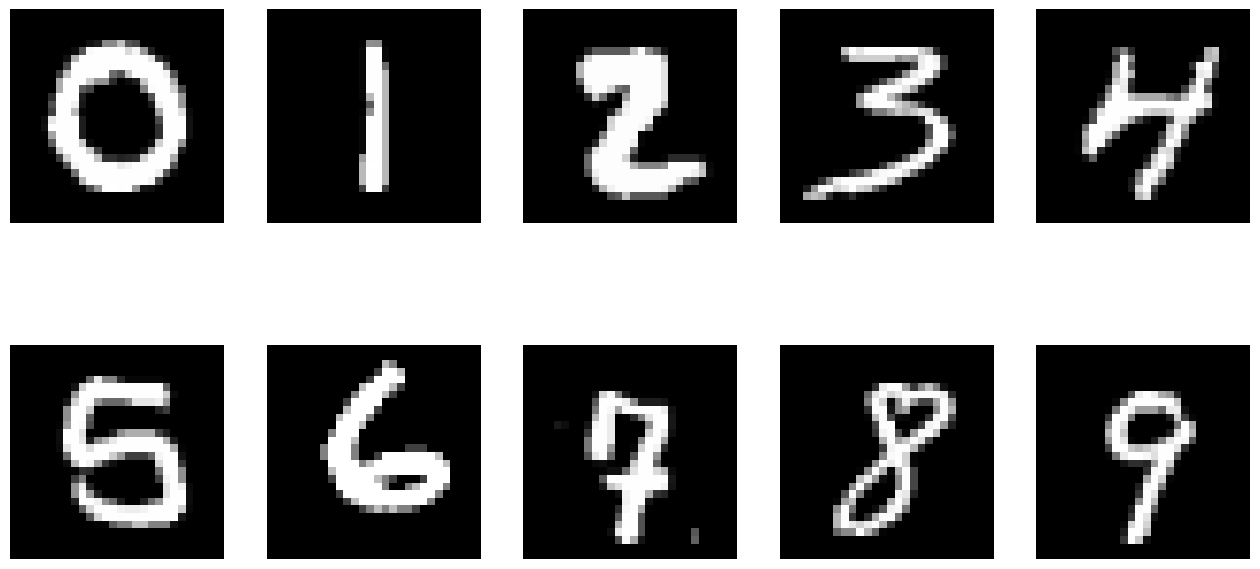

In [27]:
count = 0
fig = plt.figure(figsize=(16, 8))
for i in range(digits.shape[0]):
    if labels[i]==count:
        ax = fig.add_subplot(2,5,count+1)
        ax.imshow(viewImage(digits[i,:]),'gray')
        ax.axis('off')
        count += 1
    if count==10:
        break
plt.show()

### We're playing with the data now. Here's an average image of all 1's in the dataset ###

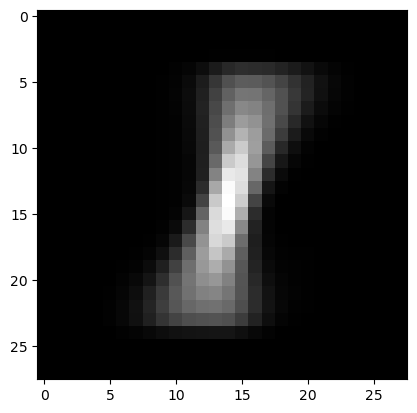

In [29]:
sumOfFives = np.zeros([28,28])
count = 0
for i in range(digits.shape[0]):
    if labels[i]==1:
        sumOfFives += viewImage(digits[i,:])
        count += 1
avg = np.uint8(sumOfFives / count)
plt.imshow(avg,'gray')

    

## How to apply clustering on this dataset? ##

In [33]:
from sklearn.cluster import KMeans, MeanShift 
np.random.seed(42)
m1 = KMeans(10)
m1.fit(digits)
print(m1.cluster_centers_)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Visualization of a cluster below. It's not great, but not absolute random either ###

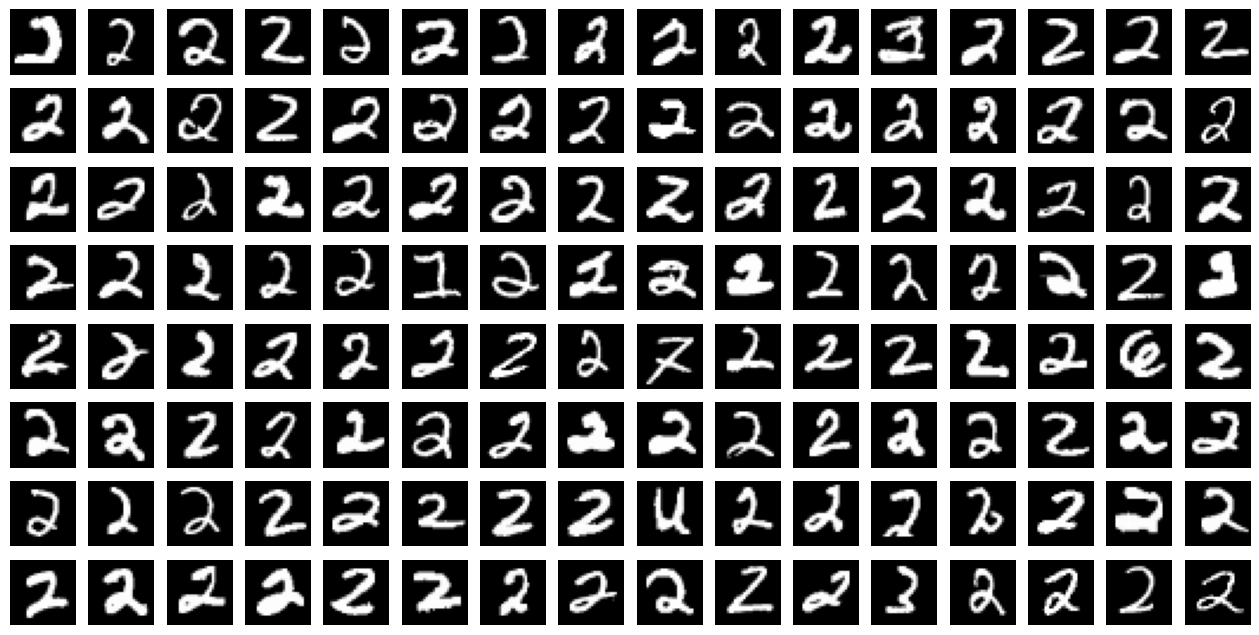

In [41]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 3

for row in range(digits.shape[0]):
    if m1.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = viewImage(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()

### We can, of course, do clustering on the 784-dimensional data. But we can't visualize it. To visualize it we need to reduce the number of dimensions to 2. There are proper ways to reduce dimensionality, but let's manually choose two values to represent all 784. ###

### We can try to choose different values - here the example shows choosing pixel average and number of nonzero pixels. You can also use standard deviation. ###

In [ ]:
averages = np.average(digits,axis=1)
averages.shape

In [ ]:
averages

In [ ]:
temp = np.uint8(digits!=0)
nonzeros = np.sum(temp,axis=1)
nonzeros.shape

In [ ]:
plt.scatter(averages,nonzeros,c=labels)

### The data points are spread along a narrow band because the two dimensions we chose - averages and number of nonzero pixels - are very closely correlated.

In [ ]:
d = np.stack([averages,nonzeros],axis=1)
d

In [ ]:
## Alternative strategy with standard deviation instead of number of nonzero values
# stdevs = np.std(digits,1)
# plt.scatter(averages,stdevs,c=labels)
# d = np.stack([averages,stdevs],axis=1)

In [ ]:
from sklearn.cluster import KMeans, MeanShift 
np.random.seed(42)
m1 = KMeans(10)
m1.fit(d)
print(m1.cluster_centers_)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])
plt.show()

### Visualization of a cluster below. It's not great, but not absolute random either ###

In [ ]:
count = 0

fig=plt.figure(figsize=(16, 8))

columns = 16
rows = 8
cluster_we_need_to_see = 1

for row in range(digits.shape[0]):
    if m1.labels_[row] == cluster_we_need_to_see:
        count = count + 1
        pic = viewImage(digits[row,:])
        fig.add_subplot(rows, columns, count)
        plt.imshow(pic,'gray')
        plt.axis('off')
        
    if count == rows * columns:
        break
plt.show()